#### Week - 5. Assignment (Section B)

Here, the focus is the quantum statistical mechnaics, the harmonic and anharonic oscillator, it other words: a particle in a harmonic or an anharmonic potential



#### B. 
In Section **A2** we were able to determine the probability pi(x) of the quantum particle to be at position x, because we had as input **all the wave functions** and **all the energies**.
In this section, you will arrive at the same result (computation of $\pi(x)$), but without using this input. We will do matrix-squaring (Section **B1**) and the path-integral Monte Carlo simulation (Section **B2**)

**B1**(Matrix Squaring)

- Download the program harmonic_matrix_square.py
- Modify your program further so that it output $\pi(x)$ at the final beta onto a file (notice that $\pi(x) = \rho(x, x, \beta)/Z$ with $Z = \int \rho(x,x, \beta) dx$. This can be done by adding the following snippet.

Z = sum(rho[j, j] for j in range(nx + 1)) * dx <br>
pi_of_x = [rho[j, j] / Z for j in range(nx + 1)]<br>
f = open('data_harm_matrixsquaring_beta' + str(beta) + '.dat', 'w')<br>
for j in range(nx + 1):<br>
    f.write(str(x[j]) + ' ' + str(rho[j, j] / Z) + '\n')<br>
f.close()<br>


In [1]:
import math, numpy
import matplotlib.pyplot as plt
import pylab

# Free off-diagonal density matrix
def rho_free(x, xp, beta):
    return (math.exp(-(x - xp) ** 2 / (2.0 * beta)) /
            math.sqrt(2.0 * math.pi * beta))

# Harmonic density matrix in the Trotter approximation (returns the full matrix)
def rho_harmonic_trotter(grid, beta):
    return numpy.array([[rho_free(x, xp, beta) * \
                         numpy.exp(-0.5 * beta * 0.5 * (x ** 2 + xp ** 2)) \
                         for x in grid] for xp in grid])

x_max = 5.0
nx = 100
dx = 2.0 * x_max / (nx - 1)
x = [i * dx for i in range(-(nx - 1) // 2, nx // 2 + 1)]
beta_tmp = 2.0 ** (-5)                   # initial value of beta (power of 2)
beta     = 2.0 ** 4                      # actual value of beta (power of 2)

rho = rho_harmonic_trotter(x, beta_tmp)  # density matrix at initial beta
while beta_tmp < beta:
    rho = numpy.dot(rho, rho)
    rho *= dx
    beta_tmp *= 2.0
    #print ('beta: %s -> %s' % (beta_tmp / 2.0, beta_tmp))
    Z = sum(rho[j, j] for j in range(nx + 1)) * dx
    pi_of_x = [rho[j, j] / Z for j in range(nx + 1)]
    f = open('data_harm_matrixsquaring_beta' + str(beta) + '.dat', 'w')
    for j in range(nx + 1):
        f.write(str(x[j]) + ' ' + str(rho[j, j] / Z) + '\n')
    f.close()


- Modify it so that it plots the pi(x) at the final beta. In the same plot, show the analytic curve for $\pi(x)$ (the function $\pi_{quant}(x)$, from section A2).


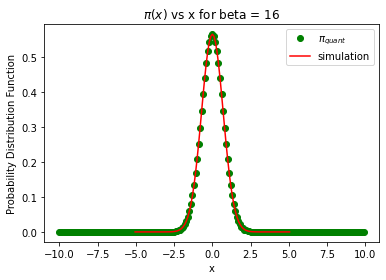

In [2]:
# An exact form of normalized probablility density in quantum and classical state
def pi_quant(x,beta):
    return (math.sqrt(math.tanh(beta/2)/math.pi)*math.exp(-x**2 /math.tanh(beta/2)))

#Exact form of quantum wavefunction   
Pi_Quant = [] #initialize the vector Psi
grid_x = [i * 0.1 for i in range(-100, 100)]
pi_quant2 = {}
beta = 16
for xx in grid_x:
    pi_quant2[xx] = [pi_quant(xx,beta)]# ground state
    Pi_Quant.append(pi_quant2[xx])
pylab.plot(grid_x, Pi_Quant, 'o', color = 'green')
pylab.plot(x, pi_of_x, color = 'red')
pylab.xlabel('x')
pylab.ylabel('Probability Distribution Function')
pylab.title('$\pi(x)$ vs x for beta = 16')
pylab.legend(['$\pi_{quant}$', 'simulation'])


Then: <br>

- Without actually running the program, explain why, at high temperature, the quantum harmonic oscillator density matrix $\rho(x,x, \beta)$ is "**almost classical**". 


At $\beta \rightarrow 0$, the density matrix for quantum harmonic oscillator $\rho(x,x, \beta) \equiv \rho(x,x, \beta)_{free}$, the particle can be anywhere between $x = \pm \infty$.


**B1 (continued)**

Run your program for $\beta=4$, and keep the data file for **Section B2**. Upload your program.

Text(0.5, 1.0, '$\\pi(x)$ vs x for beta = 4')

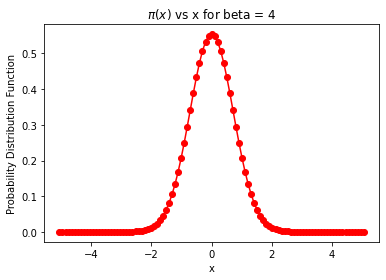

In [3]:
import math, numpy

# Free off-diagonal density matrix
def rho_free(x, xp, beta):
    return (math.exp(-(x - xp) ** 2 / (2.0 * beta)) /
            math.sqrt(2.0 * math.pi * beta))

# Harmonic density matrix in the Trotter approximation (returns the full matrix)
def rho_harmonic_trotter(grid, beta):
    return numpy.array([[rho_free(x, xp, beta) * \
                         numpy.exp(-0.5 * beta * 0.5 * (x ** 2 + xp ** 2)) \
                         for x in grid] for xp in grid])

x_max = 5.0
nx = 100
dx = 2.0 * x_max / (nx - 1)
x = [i * dx for i in range(-(nx - 1) // 2, nx // 2 + 1)]
beta_tmp = 2.0 ** (-6)                   # initial value of beta (power of 2)
beta     = 2.0 ** 2                      # actual value of beta (power of 2)

rho = rho_harmonic_trotter(x, beta_tmp)  # density matrix at initial beta
while beta_tmp < beta:
    rho = numpy.dot(rho, rho)
    rho *= dx
    beta_tmp *= 2.0
    #print ('beta: %s -> %s' % (beta_tmp / 2.0, beta_tmp))
    Z = sum(rho[j, j] for j in range(nx + 1)) * dx
    pi_of_x = [rho[j, j] / Z for j in range(nx + 1)]
    f = open('data_harm_matrixsquaring_beta_4' + str(beta) + '.dat', 'w')
    for j in range(nx + 1):
        f.write(str(x[j]) + ' ' + str(rho[j, j] / Z) + '\n')
    f.close()
    
pylab.plot(x, pi_of_x,'-o',color = 'red')
pylab.xlabel('x')
pylab.ylabel('Probability Distribution Function')
pylab.title('$\pi(x)$ vs x for beta = 4')    

**B1 (continued)**

Note that the program does matrix squaring from an initial inverse 
temperature (that is set to 2 ^-6) to the final inverse temperature 2^2 = 4. Note furthermore that there is a discretization dx, and a maximum  value of x (x_max). Vary these parameters, in order to understand, very 
roughly, what are acceptable choice for the initial temperature and for the discretization. Explain this in two sentences.

##### **B2 (Path-integral Monte Carlo algorithm for the harmonic oscillator)**

- Download the program naive_harmonic_path.py (from Lecture 5). We suggest you work in a new directory.

- Modify this program so that it generates the normed histogramof the x[0], that is the position of the path at slice 0. Do not record samples at each iteration, but wait for a fixed number of steps between one measurement and another (To wait 10 steps between records, introduce the condition if step % 10 == 0:).

- Modify this program further by inputting the matrix-squaring  data file from Section B1 and by plotting these data together with the histogram.

You may use the following function to read a two-column file into two lists:<br>

def read_file(filename):<br>
    list_x = []<br>
    list_y = []<br>
    with open(filename) as f:<br>
        for line in f:<br>
            x, y = line.split()<br>
            list_x.append(float(x))<br>
            list_y.append(float(y))<br>
    f.close()<br>
    return list_x, list_y<br>

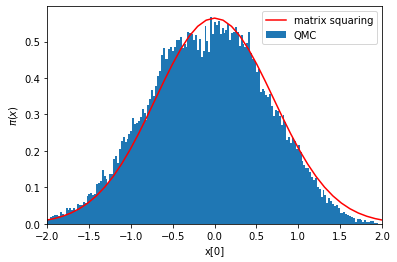

In [4]:
import math, random

def rho_free(x, x1, beta):    # free off-diagonal density matrix
    return math.exp(-(x - x1) ** 2 / (2.0 * beta)) 

beta = 4.0
N =10                                           # number of slices
dtau = beta / N
delta = 0.1                                      # maximum displacement on one slice
n_steps =1000000                                # number of Monte Carlo steps
x = [0.0] * N                                     # initial path
y_hist = []
for step in range(n_steps):
    k = random.randint(0, N - 1)                  # random slice
    knext, kprev = (k + 1) % N, (k - 1) % N       # next/previous slices
    x_new = x[k] + random.uniform(-delta, delta)  # new position at slice k
    old_weight  = (rho_free(x[knext], x[k], dtau) *
                   rho_free(x[k], x[kprev], dtau) *
                   math.exp(-0.5 * dtau * x[k] ** 2))
    new_weight  = (rho_free(x[knext], x_new, dtau) *
                   rho_free(x_new, x[kprev], dtau) *
                   math.exp(-0.5 * dtau * x_new ** 2))
    if random.uniform(0.0, 1.0) < new_weight / old_weight:
        x[k] = x_new
        if step%10 == 0:
            y_hist.append(x[0])

pylab.hist(y_hist, 200, density = 'True', stacked = 'True')
#Code for reading a file with (2xn) list
def read_file(filename):
    list_x = []
    list_y = []
    with open(filename) as f:
        for line in f:
            x, y = line.split()
            list_x.append(float(x))
            list_y.append(float(y))
    f.close()
    return list_x, list_y
filename = 'data_harm_matrixsquaring_beta16.0.dat'
[list_x, list_y] = read_file(filename)
plt.plot(list_x, list_y, color = 'red')
plt.xlim(-2,2)
plt.xlabel('x[0]')
plt.ylabel('$\pi(x)$')
plt.legend(['matrix squaring', 'QMC'])

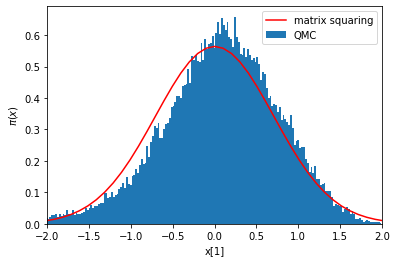

In [5]:
import math, random

def rho_free(x, x1, beta):    # free off-diagonal density matrix
    return math.exp(-(x - x1) ** 2 / (2.0 * beta)) 

beta = 4.0
N =10                                           # number of slices
dtau = beta / N
delta = 0.1                                      # maximum displacement on one slice
n_steps =1000000                                # number of Monte Carlo steps
x = [0.0] * N                                     # initial path
y_hist = []
for step in range(n_steps):
    k = random.randint(0, N - 1)                  # random slice
    knext, kprev = (k + 1) % N, (k - 1) % N       # next/previous slices
    x_new = x[k] + random.uniform(-delta, delta)  # new position at slice k
    old_weight  = (rho_free(x[knext], x[k], dtau) *
                   rho_free(x[k], x[kprev], dtau) *
                   math.exp(-0.5 * dtau * x[k] ** 2))
    new_weight  = (rho_free(x[knext], x_new, dtau) *
                   rho_free(x_new, x[kprev], dtau) *
                   math.exp(-0.5 * dtau * x_new ** 2))
    if random.uniform(0.0, 1.0) < new_weight / old_weight:
        x[k] = x_new
        if step%10 == 0:
            y_hist.append(x[1])

pylab.hist(y_hist, 200, density = 'True', stacked = 'True')
#Code for reading a file with (2xn) list
def read_file(filename):
    list_x = []
    list_y = []
    with open(filename) as f:
        for line in f:
            x, y = line.split()
            list_x.append(float(x))
            list_y.append(float(y))
    f.close()
    return list_x, list_y
filename = 'data_harm_matrixsquaring_beta16.0.dat'
[list_x, list_y] = read_file(filename)
plt.plot(list_x, list_y, color = 'red')
plt.xlim(-2,2)
plt.xlabel('x[1]')
plt.ylabel('$\pi(x)$')
plt.legend(['matrix squaring', 'QMC'])